Train on 55309 samples, validate on 13828 samples
Epoch 1/5
55309/55309 [==============================] - 81s 1ms/step - loss: 2.0894 - acc: 0.4310 - val_loss: 0.8459 - val_acc: 0.7775
Epoch 2/5
55309/55309 [==============================] - 79s 1ms/step - loss: 0.9017 - acc: 0.7312 - val_loss: 0.4690 - val_acc: 0.8718
Epoch 3/5
55309/55309 [==============================] - 79s 1ms/step - loss: 0.6359 - acc: 0.8105 - val_loss: 0.3192 - val_acc: 0.9141
Epoch 4/5
55309/55309 [==============================] - 79s 1ms/step - loss: 0.5176 - acc: 0.8471 - val_loss: 0.2688 - val_acc: 0.9278
Epoch 5/5
13828/13828 [==============================] - 6s 430us/step
正解率= 0.9408446630026034 loss= 0.22562647920176235


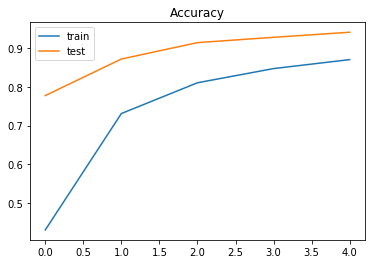

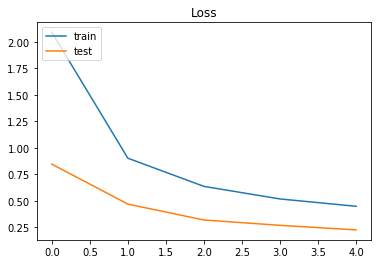

In [7]:
import numpy as np
import cv2, pickle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# データファイル
data_file = "./png-etl1/katakana.pickle"
# 入力データの数
im_size = 25
# 出力データの数
out_size = 46 # ア〜ン
# 画像の色空間（グレイスケール）
im_color = 1
in_shape = (im_size,im_size, im_color)

# 保存した画像データの一覧読み込む
data = pickle.load(open(data_file,"rb"))

# 画像データの画素を0-1の範囲の実数に変換
y = []
x = []
for d in data:
    # pickleされた数字と画像のデータ
    (num, img) = d
    # reshape()で画素を一列に、最大値の２５５でわる
    img = img.reshape(im_size, im_size, im_color).astype('float') / 255
    y.append(keras.utils.np_utils.to_categorical(num, out_size))
    x.append(img)
x = np.array(x)
y = np.array(y)

# 学習用とテスト用に分類
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# モデル定義 複雑なCNN
model = Sequential()
# 畳み込み層
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=in_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
# プーリング層
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size,activation='softmax'))

# モデルコンパイル
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size = 128,epochs = 5, verbose =1,
         validation_data = (x_test, y_test))


# モデル評価
score = model.evaluate(x_test, y_test, verbose =1)
print('正解率=', score[1],'loss=', score[0])

# 学習の様子をグラフへ描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc = 'upper left')
plt.show()